<a href="https://colab.research.google.com/github/atgdot/child_malnutrition_02/blob/main/model2(clsutering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd


data = pd.read_csv('/content/sampled_final_data_preprocessed (2).csv')
data

,Unnamed: 0,state,Area,Source of drinking water,Toilet Facility,Religion,sex of household head,wealth index,Mother's age at first birth,number of living children,...,hw9,hw12,Caste,currently in union,immunization,bmi,H/A,W/A,W/H,mothers_bmi
0,0,North_India,Rural,Improved,Improved,Muslim,Male,Middle,20-29,3,...,13226.0,13065.0,Others,Currently married,Not immunized,0.226670,-0.017059,1.088496,0.116814,3.1
1,1,North_India,Rural,Improved,Improved,Muslim,Male,Richest,30-39,1,...,99998.0,99998.0,Others,Never married,Immunized,0.226380,0.122373,-33.000000,-3.525000,2.4
2,2,North_India,Rural,Improved,Improved,Muslim,Male,Richer,30-39,1,...,7899.0,8344.0,OBC,Currently married,Not immunized,0.142825,-0.121636,-1.214286,-0.137500,2.3
3,3,North_India,Rural,Improved,Improved,Muslim,Male,Richest,30-39,1,...,7440.0,8554.0,Others,Currently married,Not immunized,0.141117,-0.065763,-3.791667,-0.416667,2.4
4,4,North_India,Rural,Improved,Improved,Muslim,Male,Poorer,20-29,5,...,7761.0,8136.0,Others,Currently married,Not immunized,0.132220,-0.062812,0.511236,0.056180,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72543,73167,North_India,Rural,Improved,Other,Muslim,Male,Middle,20-29,3,...,8808.0,8443.0,ST,Currently married,Not immunized,0.143513,-0.039516,-0.976471,-0.108235,2.3
72544,73168,North_India,Rural,Improved,Other,Muslim,Male,Poorer,<20,4,...,9066.0,10496.0,ST,Currently married,Not immunized,0.178506,-0.054580,-1.724138,-0.187931,2.3
72545,73169,North_India,Urban,Improved,Improved,Muslim,Male,Poorer,20-29,2,...,8496.0,8350.0,ST,Currently married,Immunized,0.144097,-0.027890,2.233333,0.253333,2.5
72546,73170,North_India,Urban,Improved,Improved,Muslim,Male,Poorer,20-29,2,...,7203.0,6846.0,ST,Currently married,Not immunized,0.114348,-0.021958,0.417219,0.047682,3.2


In [17]:
print(data.columns)

Index(['Unnamed: 0', 'state', 'Area', 'Source of drinking water',
       'Toilet Facility', 'Religion', 'sex of household head', 'wealth index',
       'Mother's age at first birth', 'number of living children',
       'mother's weight', 'mother's height', 'v440', 'v441', 'v442', 'v444a',
       'body mass index', 'sex of child', 'months of bf',
       'index to birth history', 'hw1', 'child's weight(in kgs)(one decimal)',
       'child's height(in cms)(one decimal)', 'hw9', 'hw12', 'Caste',
       'currently in union', 'immunization', 'bmi', 'H/A', 'W/A', 'W/H',
       'mothers_bmi'],
      dtype='object')


In [22]:
columns_to_keep = [
    'state', 'Area', 'Source of drinking water', 'Toilet Facility', 'Religion',
    'sex of household head', 'wealth index',
    'number of living children', 'sex of child', 'months of bf',
    'index to birth history', 'Caste', 'currently in union', 'immunization',
    'bmi', 'H/A', 'W/A', 'W/H', 'mothers_bmi'
]

# Filter the DataFrame to keep only the specified columns
data = data[columns_to_keep]

In [23]:
data.to_csv('filtered_data.csv', index=False)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame

# Define categorical and numerical columns
categorical_columns = ['state', 'Area', 'Source of drinking water', 'Toilet Facility', 'Religion', 'sex of household head', 'wealth index', 'Caste', 'currently in union']
numerical_columns = ['number of living children', 'sex of child', 'months of bf', 'index to birth history', 'immunization', 'bmi', 'H/A', 'W/A', 'W/H', 'mothers_bmi']

# Handle categorical columns first
# Apply one-hot encoding for categorical columns without ordinal relationship
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(data[categorical_columns])

# Apply label encoding for categorical columns with ordinal relationship
label_encoder = LabelEncoder()
data_encoded = data.copy()  # Create a copy of the DataFrame to avoid modifying the original DataFrame
for col in numerical_columns:
    data_encoded[col] = label_encoder.fit_transform(data[col])

# Convert column names to strings
data_encoded.columns = data_encoded.columns.astype(str)

# Combine encoded features with numerical features
X_final = pd.concat([data_encoded[numerical_columns], pd.DataFrame(X_encoded.toarray())], axis=1)

# Convert feature names to strings
X_final.columns = X_final.columns.astype(str)

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_final)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # You can choose the number of clusters
clusters = kmeans.fit_predict(X_scaled)

# Print cluster labels for each data point
print(clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


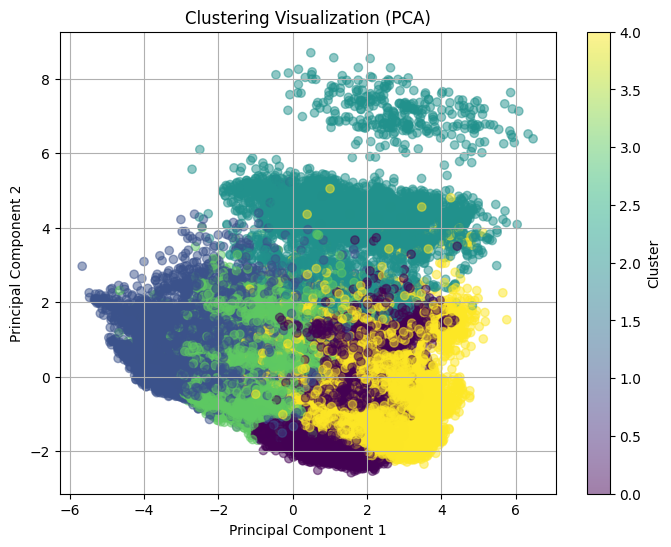

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Define categorical and numerical columns
categorical_columns = ['state', 'Area', 'Source of drinking water', 'Toilet Facility', 'Religion', 'sex of household head', 'wealth index', 'Caste', 'currently in union']
numerical_columns = ['number of living children', 'sex of child', 'months of bf', 'index to birth history', 'immunization', 'bmi', 'H/A', 'W/A', 'W/H', 'mothers_bmi']

# Handle categorical columns first
# Apply one-hot encoding for categorical columns without ordinal relationship
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(data[categorical_columns])

# Apply label encoding for categorical columns with ordinal relationship
label_encoder = LabelEncoder()
data_encoded = data.copy()  # Create a copy of the DataFrame to avoid modifying the original DataFrame
for col in numerical_columns:
    data_encoded[col] = label_encoder.fit_transform(data[col])

# Convert column names to strings
data_encoded.columns = data_encoded.columns.astype(str)

# Combine encoded features with numerical features
X_final = pd.concat([data_encoded[numerical_columns], pd.DataFrame(X_encoded.toarray())], axis=1)

# Convert feature names to strings
X_final.columns = X_final.columns.astype(str)

# Handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_final)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  # You can choose the number of clusters
clusters = kmeans.fit_predict(X_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
